In [1]:
import json
import time
import uuid
import random
from datetime import datetime
import pytz

In [2]:
import json
import time
import uuid
import random
from datetime import datetime
import pytz

# Definir las coordenadas aproximadas de Medellín
lat_range = (6.217, 6.317)  # Latitud de Medellín
lon_range = (-75.567, -75.467)  # Longitud de Medellín

# Lista de comunas y barrios de Medellín
comunas = ["COMUNA 1", "COMUNA 2", "COMUNA 3", "COMUNA 4", "COMUNA 5", "COMUNA 6", "COMUNA 7", "COMUNA 8", "COMUNA 9", "COMUNA 10", "COMUNA 11", "COMUNA 12", "COMUNA 13", "COMUNA 14", "COMUNA 15", "COMUNA 16"]
barrios = ["BARRIO 1", "BARRIO 2", "BARRIO 3", "BARRIO 4", "BARRIO 5", "BARRIO 6", "BARRIO 7", "BARRIO 8", "BARRIO 9", "BARRIO 10"]

# Generar datos simulados
def generate_event():
    event = {
        "latitude": round(random.uniform(*lat_range), 6),
        "longitude": round(random.uniform(*lon_range), 6),
        "date": datetime.now(pytz.timezone('America/Bogota')).strftime("%d/%m/%Y %H:%M:%S"),
        "customer_id": random.randint(1000, 2000),
        "employee_id": random.randint(9000, 10000),
        "quantity_products": random.randint(1, 50),
        "order_id": str(uuid.uuid4()),
        "commune": random.choice(comunas),
        "neighborhood": random.choice(barrios),
        "partition_date": datetime.now().strftime("%d%m%Y"),
        "event_date": datetime.now().strftime("%d/%m/%Y %H:%M:%S"),
        "event_day": datetime.now().day,
        "event_hour": datetime.now().hour,
        "event_minute": datetime.now().minute,
        "event_month": datetime.now().month,
        "event_second": datetime.now().second,
        "event_year": datetime.now().year
    }
    return event

def main():
    while True:
        event = generate_event()
        # Aquí se puede guardar el evento en un archivo JSON, base de datos, etc.
        # Ejemplo de guardado en un archivo JSON
        with open('simulated_data.json', 'a') as file:
            file.write(json.dumps(event) + "\n")
        # Esperar 30 segundos antes de generar el siguiente evento
        time.sleep(30)

if __name__ == "__main__":
    main()


KeyboardInterrupt: 

In [ ]:
import socket
import time

def send_data():
    host = 'localhost'  # Nombre del host o dirección IP
    port = 9999  # Puerto en el que escucha el servidor

    s = socket.socket()
    s.bind((host, port))
    s.listen(1)
    print(f"Listening on {host}:{port}")

    conn, addr = s.accept()
    print(f"Connection from {addr}")

    with open('simulated_data.json', 'r') as file:
        for line in file:
            conn.send(line.encode())
            time.sleep(1)  # Ajustar la frecuencia de envío según sea necesario

    conn.close()

if __name__ == "__main__":
    send_data()



AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

# Crear la sesión de Spark
spark = SparkSession.builder.appName("UNALWaterStream").getOrCreate()

# Crear un esquema para los datos
schema = StructType([
    StructField("latitude", DoubleType(), True),
    StructField("longitude", DoubleType(), True),
    StructField("date", StringType(), True),
    StructField("customer_id", IntegerType(), True),
    StructField("employee_id", IntegerType(), True),
    StructField("quantity_products", IntegerType(), True),
    StructField("order_id", StringType(), True),
    StructField("commune", StringType(), True),
    StructField("neighborhood", StringType(), True),
    StructField("partition_date", StringType(), True),
    StructField("event_date", StringType(), True),
    StructField("event_day", IntegerType(), True),
    StructField("event_hour", IntegerType(), True),
    StructField("event_minute", IntegerType(), True),
    StructField("event_month", IntegerType(), True),
    StructField("event_second", IntegerType(), True),
    StructField("event_year", IntegerType(), True)
])

# Leer los datos del socket
raw_data = spark.readStream.format("socket").option("host", "localhost").option("port", 9999).load()

# Convertir los datos a DataFrame usando el esquema
json_df = raw_data.select(from_json(col("value").cast("string"), schema).alias("data")).select("data.*")

# Mostrar los datos en consola (para pruebas)
query = json_df.writeStream.outputMode("append").format("console").start()

# Esperar a que el streaming finalice
query.awaitTermination()


### Ensayo hive

Para almacenar los datos procesados por Spark Streaming en una base de datos distribuida de Hive, puedes seguir los siguientes pasos:

Configurar Hive en Spark:

Asegúrate de tener un clúster de Hive configurado y accesible.
Configura Spark para interactuar con Hive.
Crear una Tabla en Hive:

Define la estructura de la tabla en Hive donde deseas almacenar los datos.
Guardar Datos en la Tabla de Hive desde Spark:

Una vez que los datos estén en el DataFrame de Spark, escribe estos datos en la tabla de Hive.
Paso 1: Configurar Hive en Spark
Asegúrate de que Spark esté configurado para usar Hive. Esto generalmente implica tener las bibliotecas de Hive en el classpath de Spark y configuraciones adecuadas en spark-defaults.conf y hive-site.xml.

Paso 2: Crear una Tabla en Hive
Puedes crear una tabla en Hive usando la CLI de Hive o a través de un script HiveQL. A continuación se muestra un ejemplo de cómo crear una tabla en Hive:

In [ ]:
CREATE TABLE water_sales (
    latitude DOUBLE,
    longitude DOUBLE,
    date STRING,
    customer_id INT,
    employee_id INT,
    quantity_products INT,
    order_id STRING,
    commune STRING,
    neighborhood STRING,
    partition_date STRING,
    event_date STRING,
    event_day INT,
    event_hour INT,
    event_minute INT,
    event_month INT,
    event_second INT,
    event_year INT
) STORED AS PARQUET;


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

# Crear la sesión de Spark con soporte para Hive
spark = SparkSession.builder \
    .appName("UNALWaterStream") \
    .enableHiveSupport() \
    .getOrCreate()

# Crear un esquema para los datos
schema = StructType([
    StructField("latitude", DoubleType(), True),
    StructField("longitude", DoubleType(), True),
    StructField("date", StringType(), True),
    StructField("customer_id", IntegerType(), True),
    StructField("employee_id", IntegerType(), True),
    StructField("quantity_products", IntegerType(), True),
    StructField("order_id", StringType(), True),
    StructField("commune", StringType(), True),
    StructField("neighborhood", StringType(), True),
    StructField("partition_date", StringType(), True),
    StructField("event_date", StringType(), True),
    StructField("event_day", IntegerType(), True),
    StructField("event_hour", IntegerType(), True),
    StructField("event_minute", IntegerType(), True),
    StructField("event_month", IntegerType(), True),
    StructField("event_second", IntegerType(), True),
    StructField("event_year", IntegerType(), True)
])

# Leer los datos del socket
raw_data = spark.readStream.format("socket").option("host", "localhost").option("port", 9999).load()

# Convertir los datos a DataFrame usando el esquema
json_df = raw_data.select(from_json(col("value").cast("string"), schema).alias("data")).select("data.*")

# Definir una función para guardar los datos en Hive
def foreach_batch_function(df, epoch_id):
    df.write.mode("append").saveAsTable("water_sales")

# Configurar la consulta de streaming para escribir en Hive
query = json_df.writeStream \
    .outputMode("append") \
    .foreachBatch(foreach_batch_function) \
    .start()

# Esperar a que el streaming finalice
query.awaitTermination()


Explicación
Configuración de Spark con Soporte para Hive:

enableHiveSupport() se usa para habilitar el soporte de Hive en la sesión de Spark.
Esquema de Datos:

Define el esquema de los datos que se recibirán y procesarán.
Lectura de Datos desde el Socket:

raw_data lee los datos del socket.
Conversión a DataFrame:

json_df convierte los datos a un DataFrame estructurado según el esquema definido.
Función foreach_batch_function:

Esta función se llama para cada micro-lote de datos y guarda los datos en la tabla de Hive usando saveAsTable.
Configuración de la Consulta de Streaming:

La consulta de streaming se configura para usar foreachBatch para guardar los datos en la tabla de Hive.
Con este enfoque, estarás almacenando los datos de tu flujo de streaming directamente en una tabla de Hive, permitiendo así su posterior análisis y procesamiento en un entorno de datos distribuido.

In [4]:
##Tratamiento de los datos
import json
import pandas as pd

# Ruta al archivo JSON
file_path = r'C:\Users\Usuario\Documents\Big data-curso\Trabajo Final\ABD_trabajo_Final\carolina_vergara\simulated_data.json'

# Leer el archivo JSON línea por línea
data = []
with open(file_path, 'r') as file:
    for line in file:
        data.append(json.loads(line))

# Convertir los datos a un DataFrame de Pandas
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame para ver la estructura de los datos
print(df.head())


   latitude  longitude                 date  customer_id  employee_id  \
0  6.272162 -75.481796  06/06/2024 19:09:29         1638         9517   
1  6.240227 -75.481789  06/06/2024 19:09:59         1797         9000   
2  6.229386 -75.499953  06/06/2024 19:10:29         1710         9241   
3  6.280269 -75.558308  06/06/2024 19:10:59         1793         9127   
4  6.217897 -75.483854  06/06/2024 19:11:29         1733         9613   

   quantity_products                              order_id    commune  \
0                 49  c1474798-58e3-4775-b484-4897ed32c0ad  COMUNA 16   
1                 45  014f5ef2-3f66-4170-8c11-b2705a046755   COMUNA 5   
2                 41  004d4bcd-7f67-47e8-a11a-9b91d36e63de   COMUNA 4   
3                 39  052cfc2f-1d01-4a6e-974c-1093b1af7850   COMUNA 7   
4                  7  b5354879-7107-449a-8dc0-69730fb3e773   COMUNA 4   

  neighborhood partition_date           event_date  event_day  event_hour  \
0     BARRIO 4       06062024  06/06/2024 19:

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Seleccionar las características y la etiqueta
features = df[['latitude', 'longitude', 'event_day', 'event_hour', 'event_minute', 'event_month', 'event_year']]
label = df['quantity_products']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Mostrar algunas predicciones
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(result_df.head())


Mean Absolute Error: 15.109941178126153
    Actual  Predicted
25      17  28.930091
13       2  31.988259
8       21  22.477500
26      32  28.737121
4        7  37.431417


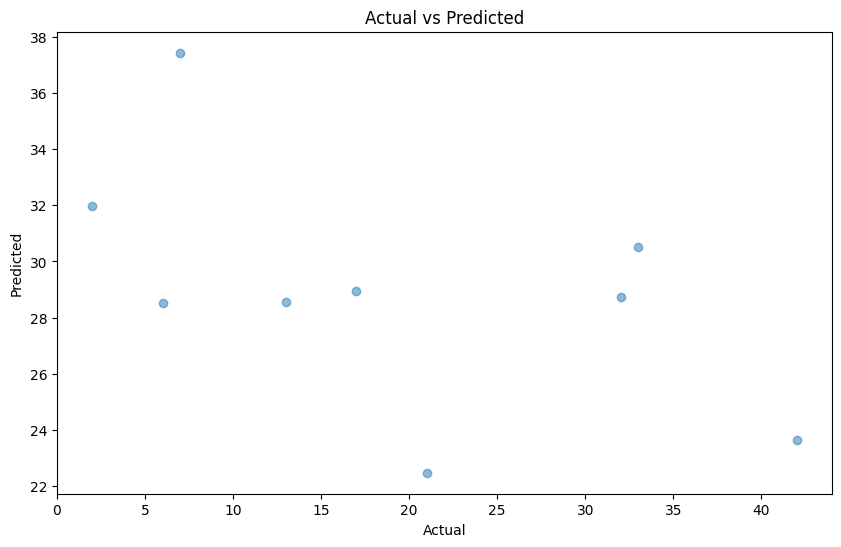

In [13]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [12]:
pip install matplotlib


  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ---- -------------------------------- 20.5/165.5 kB 330.3 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.5 kB 495.5 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.5 kB 495.5 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.5 kB 495.5 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.5 kB 495.5 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.5 kB 495.5 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.5 kB 495.5 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.5 kB 495.5 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.5 kB 495.5 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.5 kB 495.5 kB/s 